# Gold Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('goldstock.csv')
df=df.drop(columns='sno')
df.head()

,Date,Close,Volume,Open,High,Low
0,19-01-2024,2029.3,166078,2027.4,2041.9,2022.2
1,18-01-2024,2021.6,167013,2009.1,2025.6,2007.7
2,17-01-2024,2006.5,245194,2031.7,2036.1,2004.6
3,16-01-2024,2030.2,277995,2053.4,2062.8,2027.6
4,12-01-2024,2051.6,250946,2033.2,2067.3,2033.1


C:\Users\amira\AppData\Local\Temp\ipykernel_35448\875305642.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


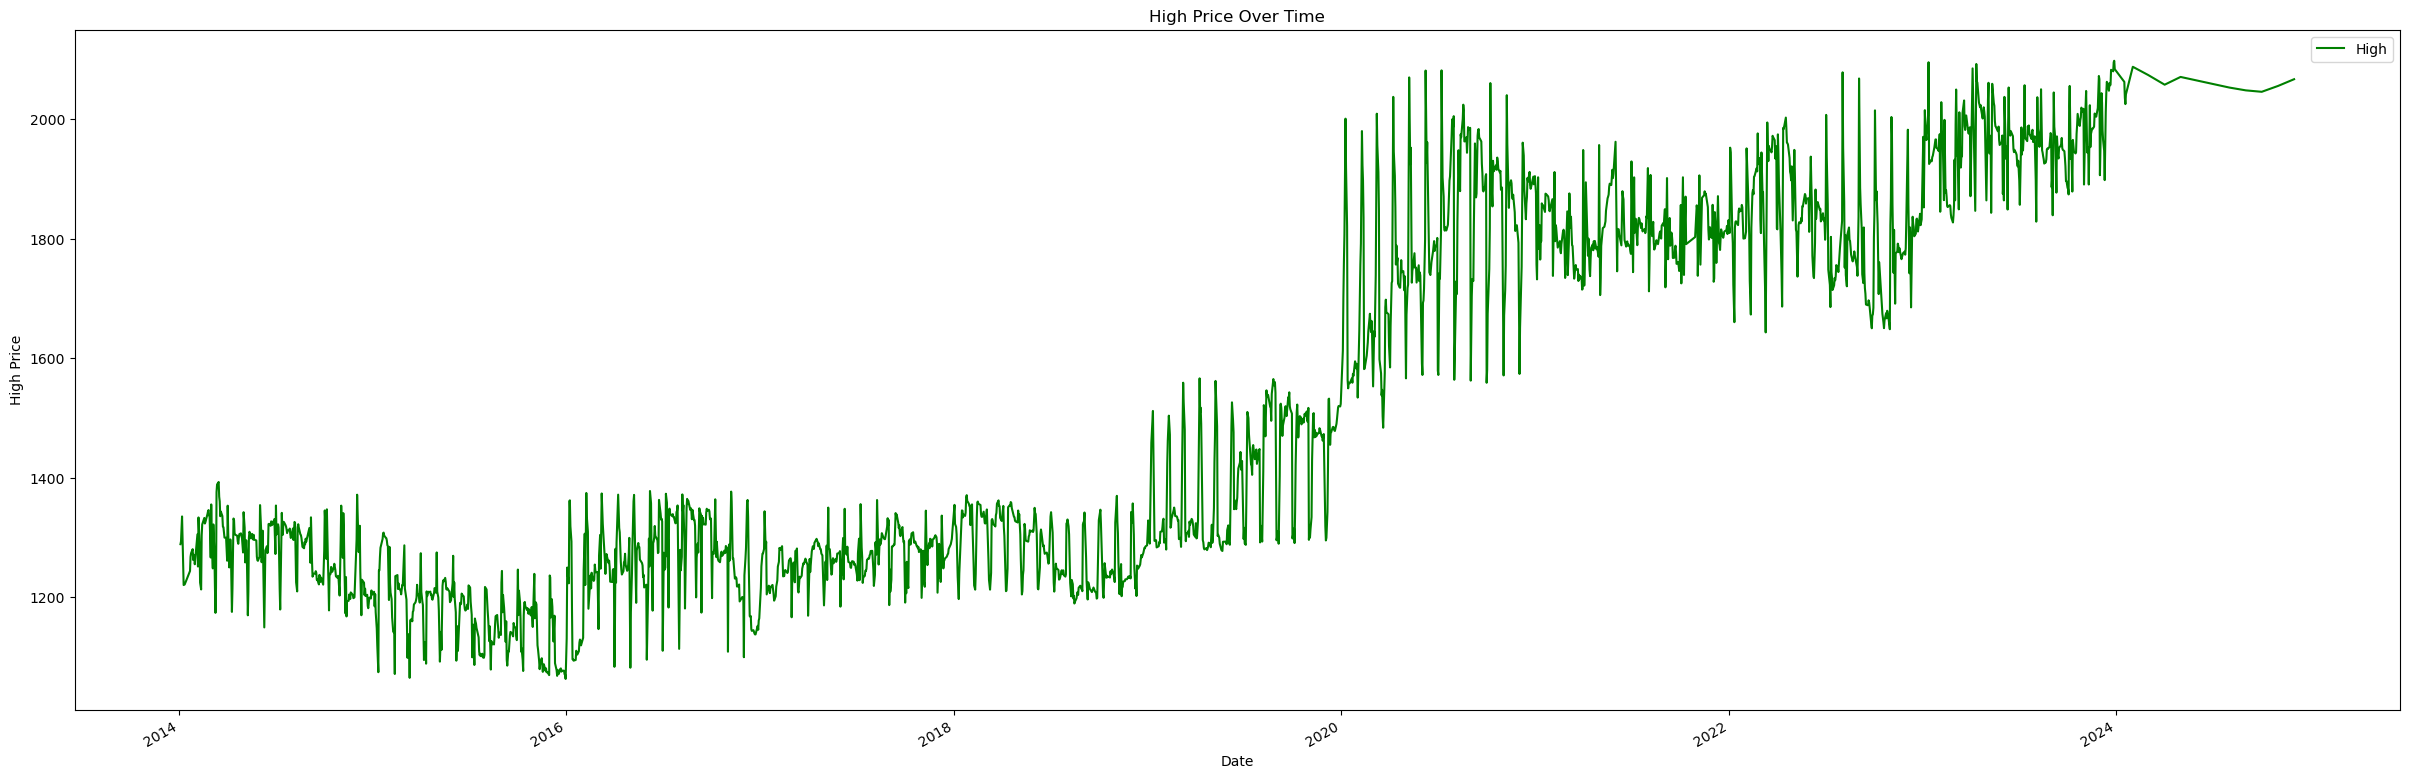

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.plot(x='Date', y='High', figsize=(30, 10), xlabel='Date', ylabel='High Price', title='High Price Over Time',c='green')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   int64         
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 117.8 KB


In [5]:
df.isnull().sum()

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

In [6]:
df.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [7]:
df=df.set_index('Date',drop=True)

# Data Visualization

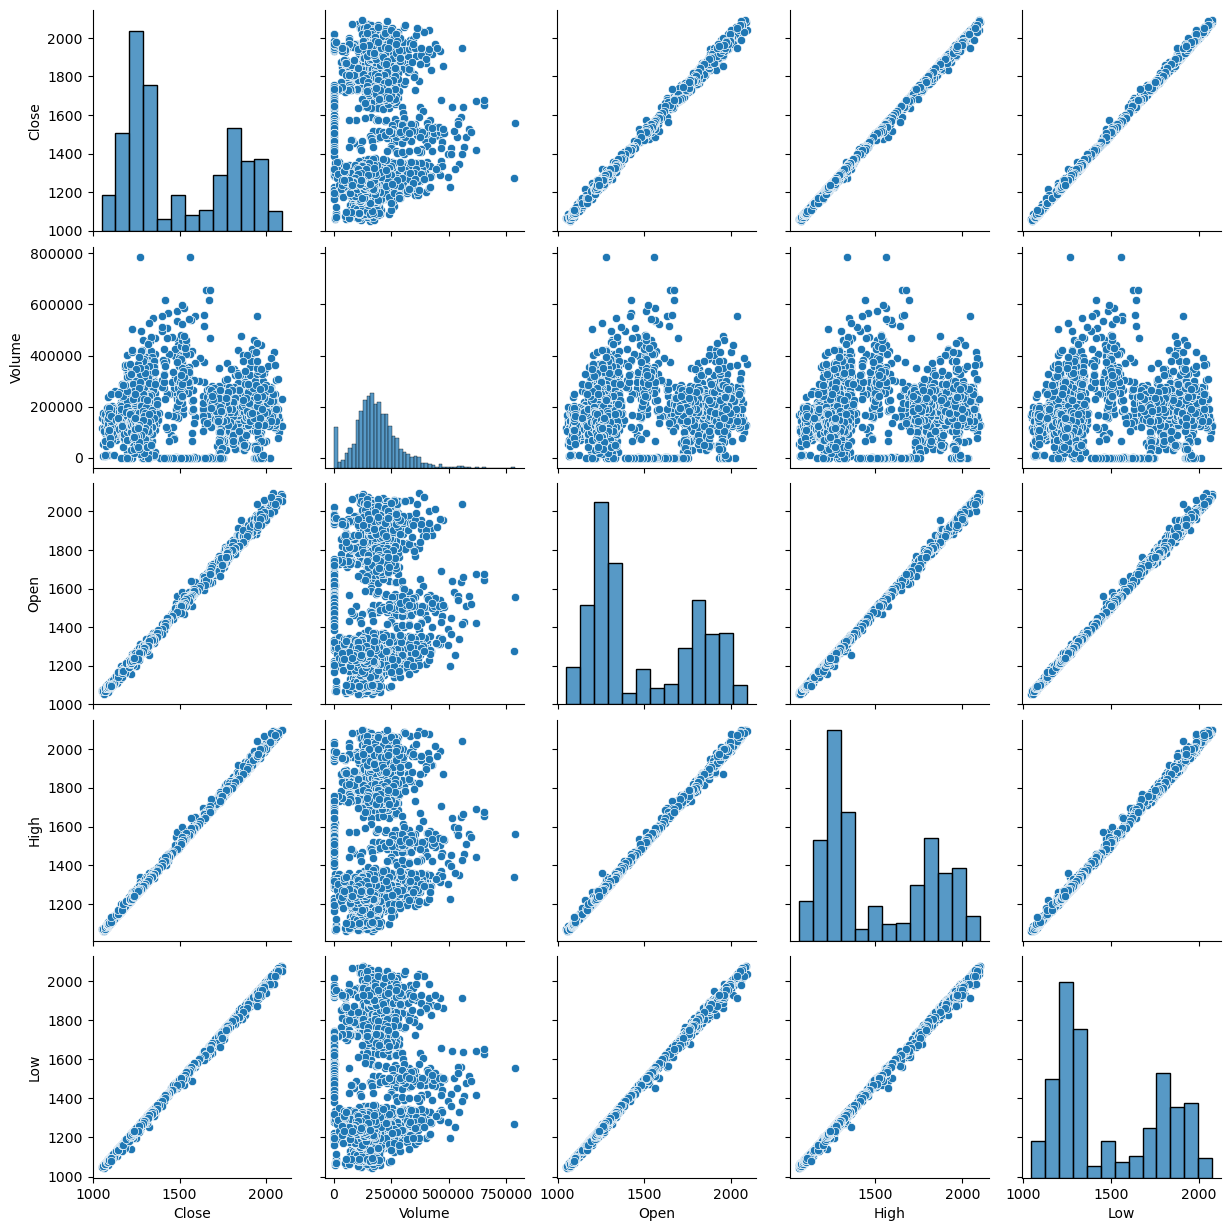

In [8]:
sns.pairplot(df)

<Axes: >

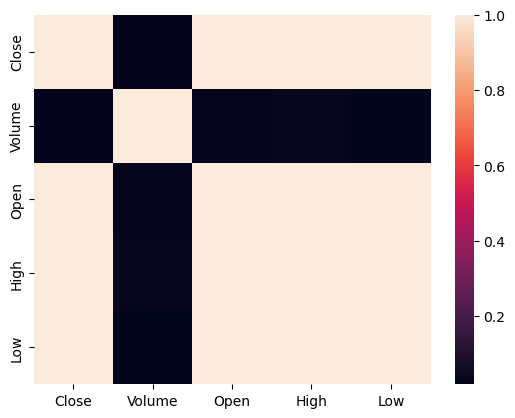

In [9]:
sns.heatmap(df.corr())

<Axes: xlabel='Date'>

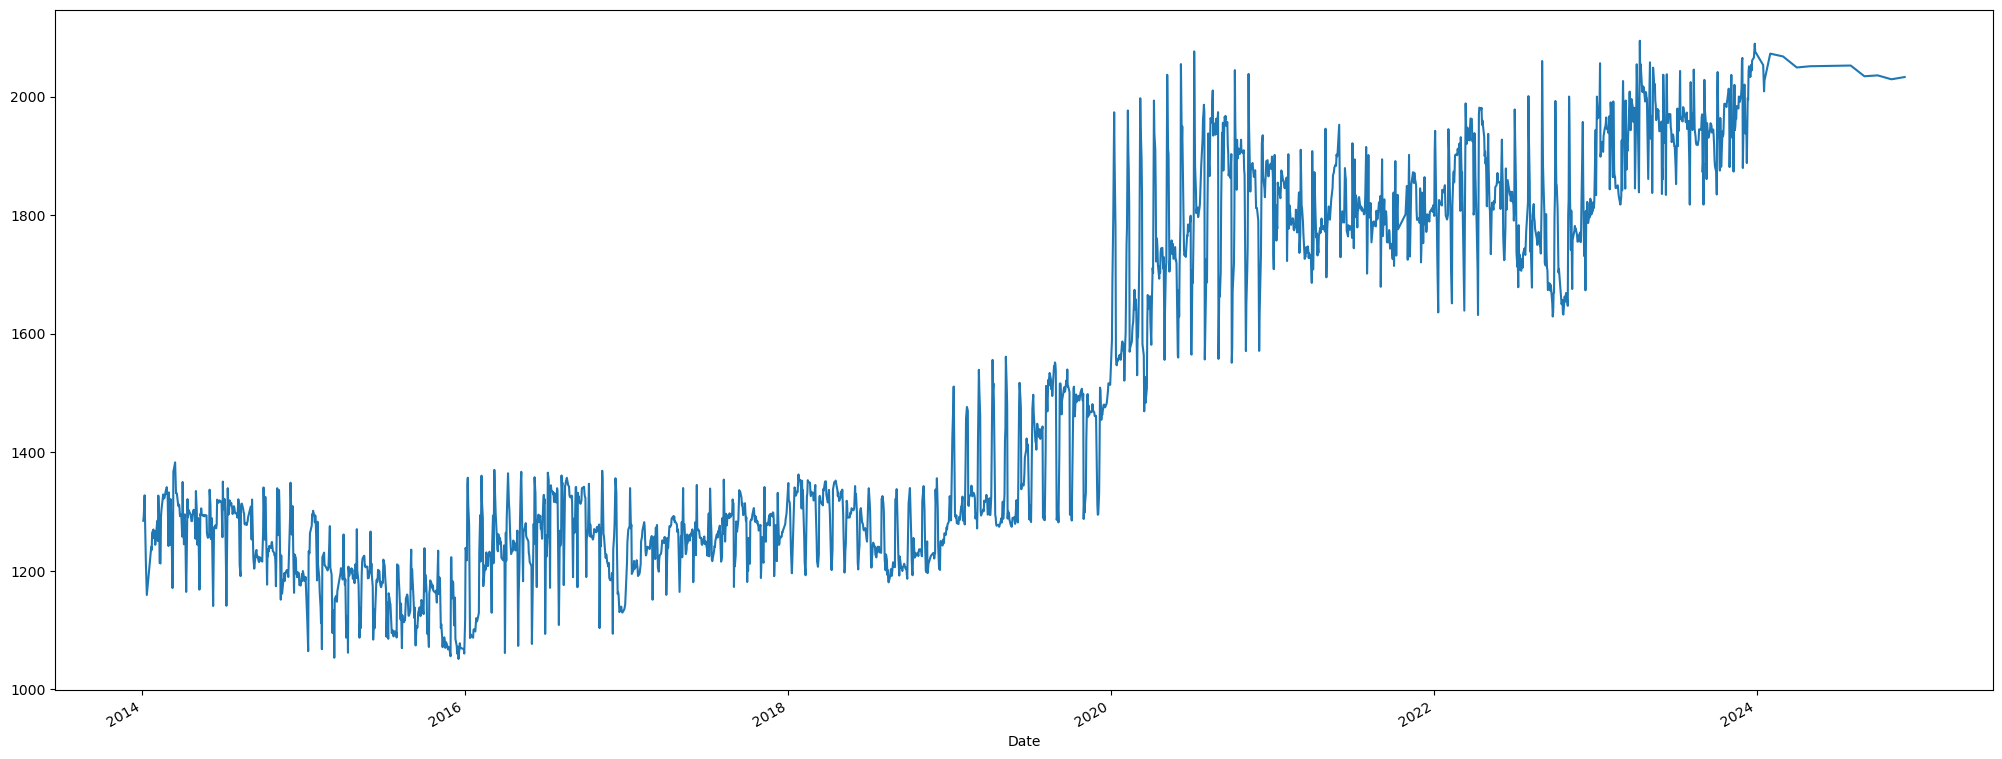

In [10]:
df['Open'].plot(figsize=(25,10))

<Axes: xlabel='Date'>

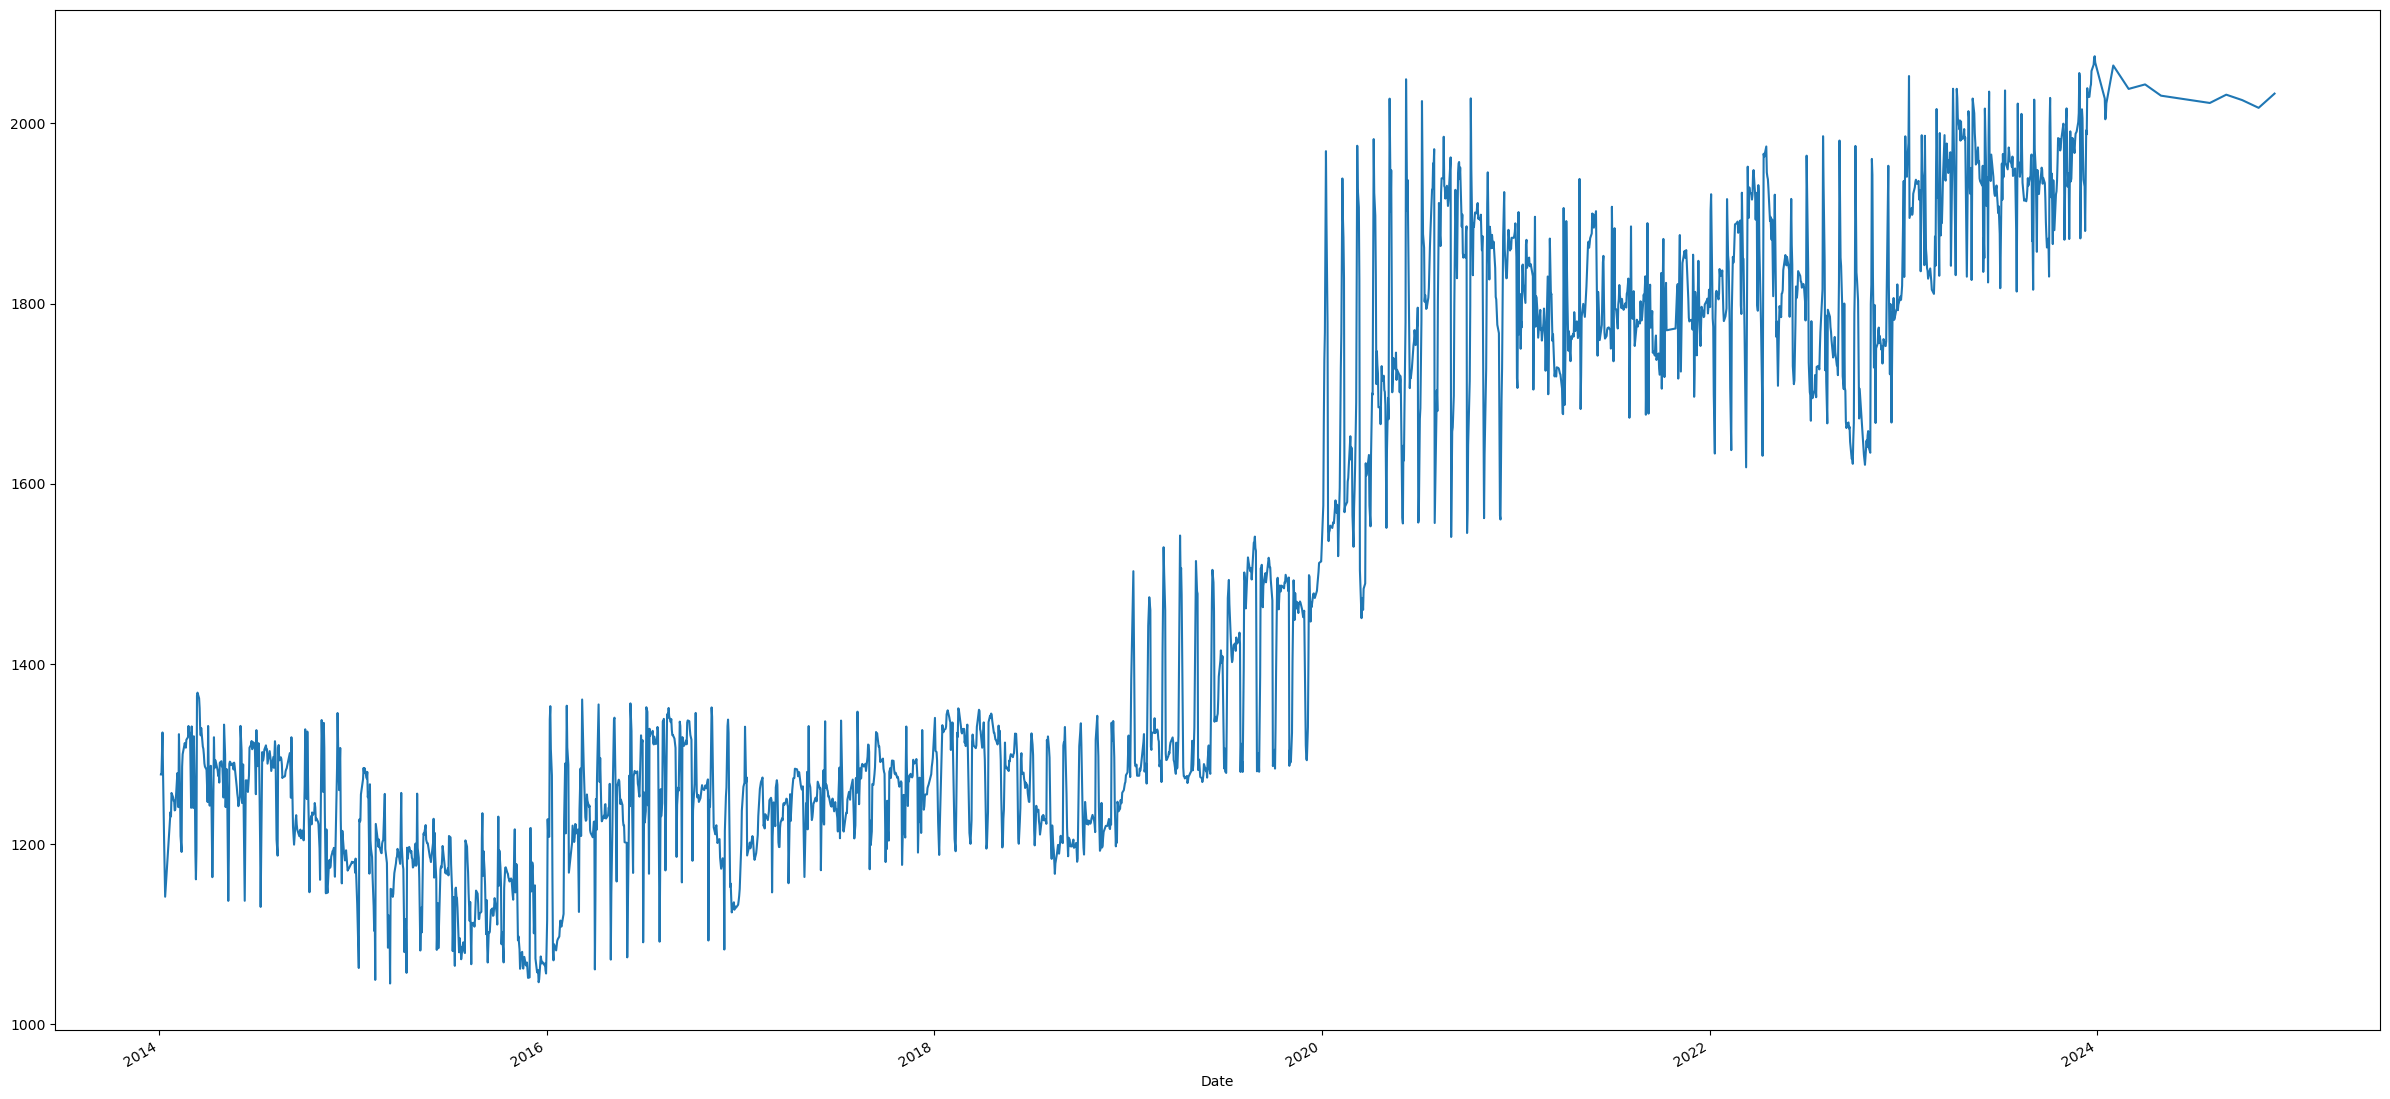

In [11]:
df['Low'].plot(figsize=(30,15))

## Feature Selection And Model Training

In [12]:
df.drop(["Volume", "Open", "High", "Low"], axis=1, inplace=True)

In [13]:
df.index.min(), df.index.max()

(Timestamp('2014-01-04 00:00:00'), Timestamp('2024-12-01 00:00:00'))

<Axes: xlabel='Date'>

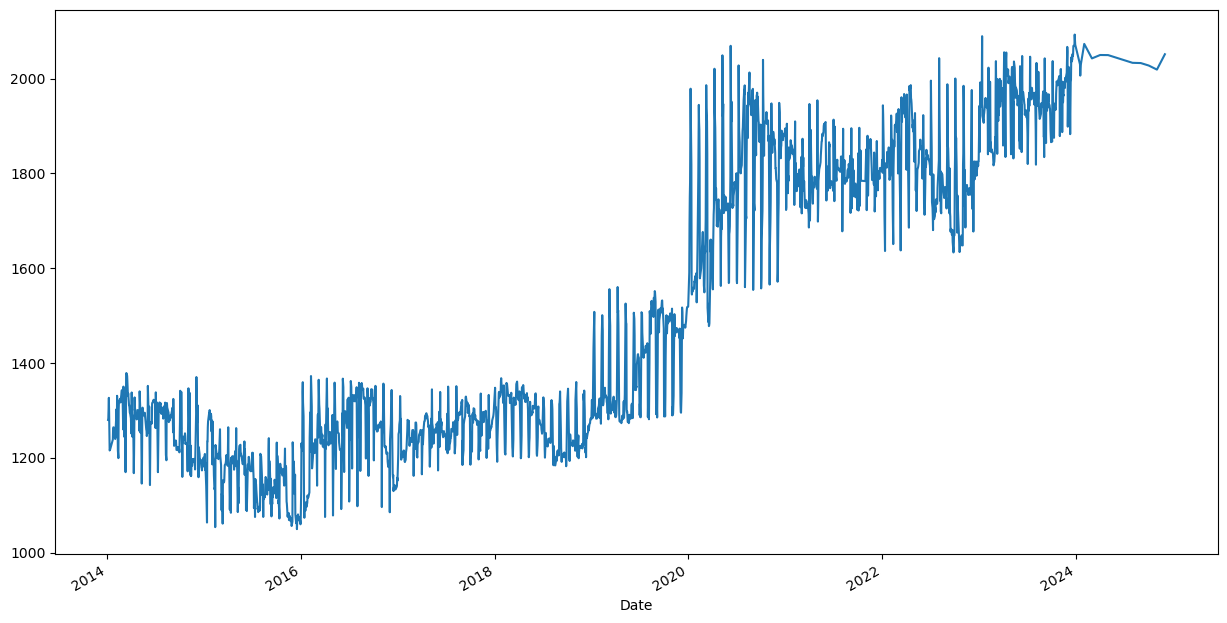

In [14]:
df['Close'].plot(figsize=(15,8))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2024-01-19 to 2014-01-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2511 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


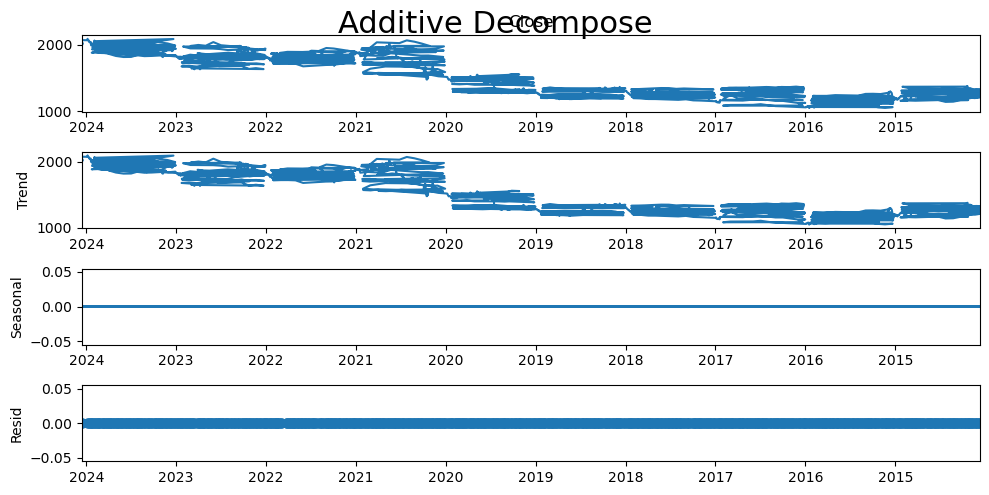

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(x=df['Close'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (10,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()



In [17]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Close'].dropna())
print(f'Test:{result[0]}')
print(f'p-value:{result[1]}')

Test:-1.7172755789704768
p-value:0.4222342775667287


In [18]:
result=adfuller(df['Close'].diff().dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-51.582887454836325
p-valor:0.0


In [19]:

fit_arima = auto_arima(df, d=1, start_p=1, star_q=1, max_p=3, max_q=3,
                      seasonal=True,
                      m=6,
                      D=1,
                      start_P=1,
                      start_Q=1,
                      max_P=2,
                      max_Q=2,
                      information_criterion='aic',
                      trace=True,
                      error_action='ignore',
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,1,1)[6]             : AIC=inf, Time=7.67 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=22371.536, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=21600.518, Time=1.46 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=2.60 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=22373.340, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=21281.348, Time=1.57 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=8.07 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.27 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=21280.148, Time=0.43 sec
 ARIMA(0,1,0)(1,1,0)[6]             : AIC=21602.070, Time=0.31 sec
 ARIMA(0,1,0)(2,1,1)[6]             : AIC=inf, Time=4.78 sec
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=21281.368, Time=0.73 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=4.83 sec
 ARIMA(0,1,0)(2,1,0)[6] intercept   : AIC=21282.142, Time=1.7

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(df,order=(0,1,0), seasonal_order=(2, 1, 0, 6))
result = model.fit()

C:\Users\amira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\amira\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                 2511
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 6)   Log Likelihood              -10637.074
Date:                           Sun, 25 Feb 2024   AIC                          21280.148
Time:                                   12:01:59   BIC                          21297.625
Sample:                                        0   HQIC                         21286.493
                                          - 2511                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -0.6955      0.013    -52.692      0.000      -0.721      -0.670
ar.S.L12      -0.3490      0.014    -24.668      0.000      -0.377      -0.321
sigma2       285.8921      4.809     59.454      0.000     276.467     295.317
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):              1491.10
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
predict = result.get_prediction(start=1)
mean_predictions = predict.predicted_mean

In [23]:
confidence_interval = predict.conf_int()
lower_limits = confidence_interval.iloc[:, 0]
upper_limits = confidence_interval.iloc[:, 1]

lower_limits[0], upper_limits[0]

(68.9015358100844, 3989.6984641899153)

In [24]:
mean_predictions.values[0]

2029.3

In [25]:
prediction_dates = np.asarray(mean_predictions.index)
dates = np.asarray(df.index)

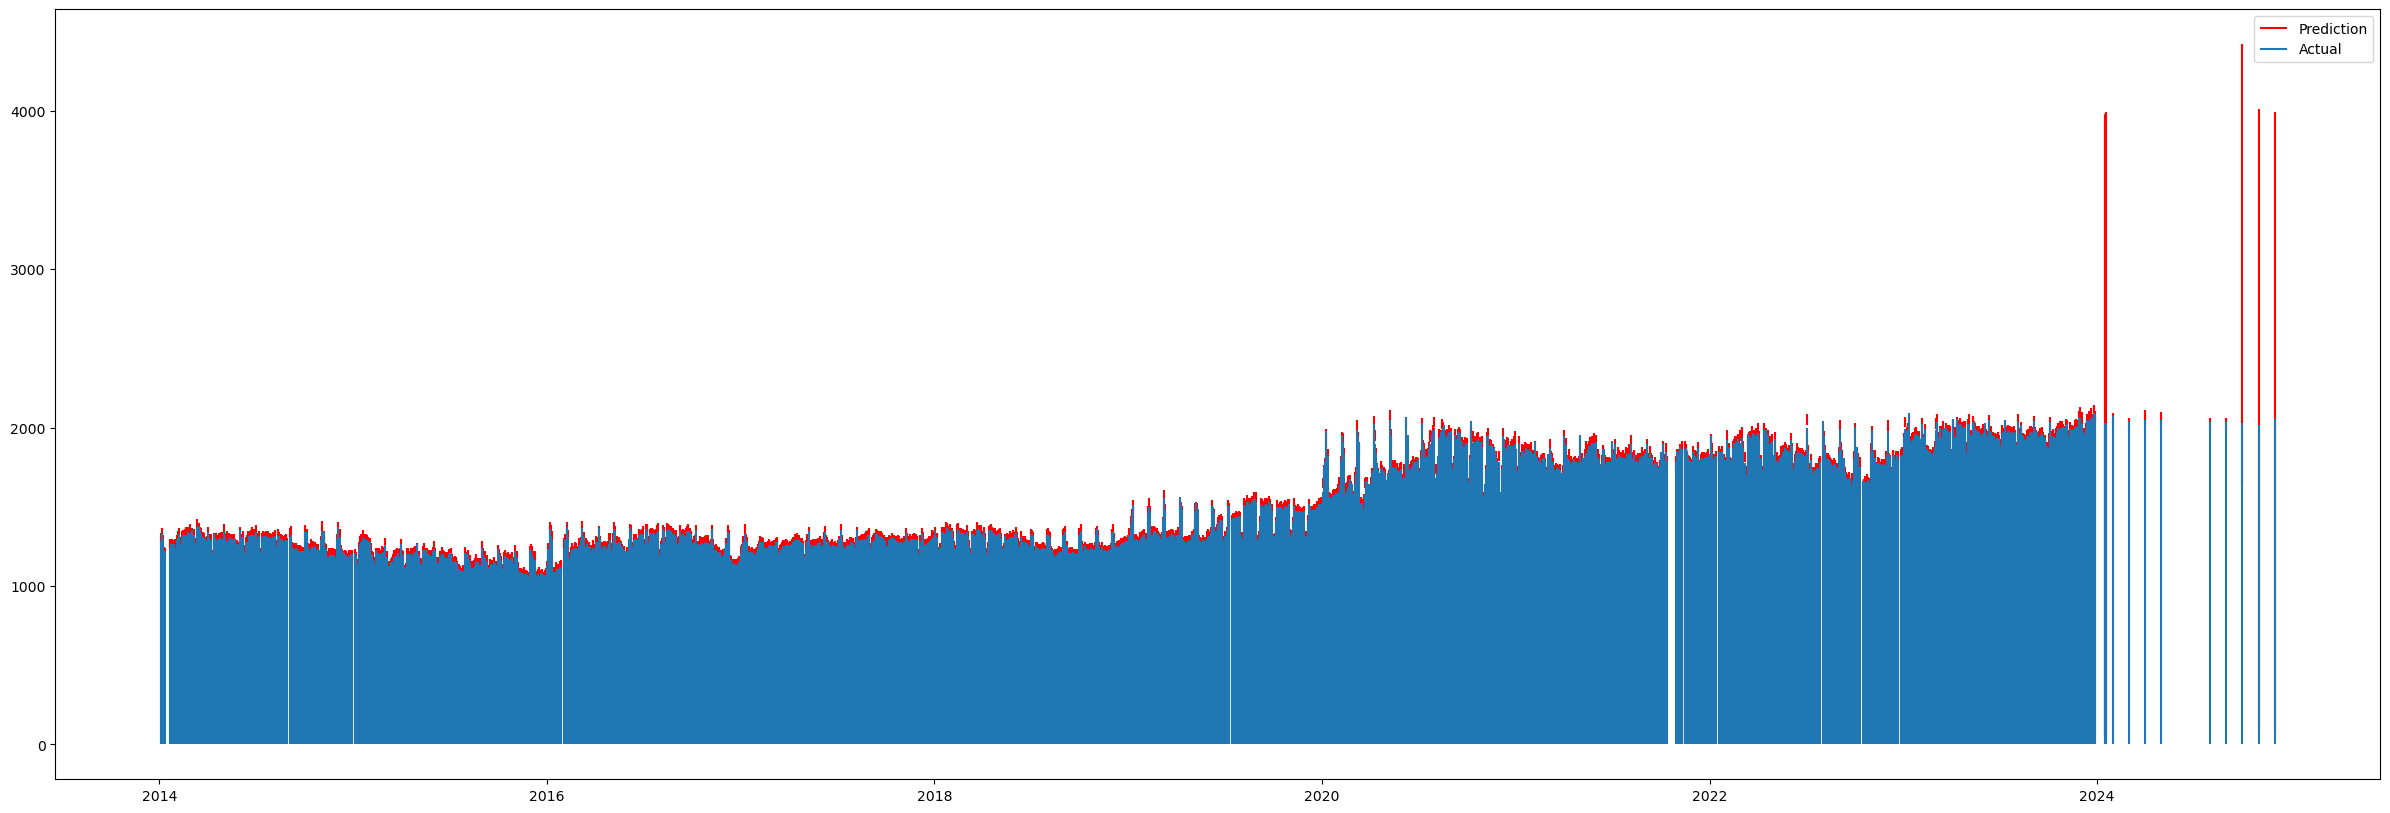

In [26]:
plt.figure(figsize=(30, 10))  # Set the figure size

# Plotting the mean predictions with vertical spikes
plt.vlines(prediction_dates, lower_limits, upper_limits, color='red', label='Prediction')  # Vertical spikes for predictions

plt.vlines(dates, 0, df.values, label='Actual')  

# Adding legend
plt.legend()

# Show the plot
plt.show()




## Model Testing

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(df[1:].values,mean_predictions.values))
print(rmse)

26.27128891986071


In [28]:
mean_predictions

Date
2024-01-18    2029.300000
2024-01-17    2021.600000
2024-01-16    2006.500000
2024-12-01    2030.200000
2024-11-01    2051.600000
                 ...     
2014-01-28    1254.057556
2014-01-27    1241.971899
2014-01-24    1262.009017
2014-01-23    1254.368338
2014-01-22    1260.628864
Name: predicted_mean, Length: 2510, dtype: float64